For lab report submissions, the idea is that your jupyter notebook is structured in one of 2 ways. You will either...

1. Read all of your data into jupyter in one section of the notebook. Then perform your fits in another section. And finally plot your data and fit in another separate section. After each section you will explain what is going in by answering the questions below.

                                                        or

2. Read in your data, perform your fits, and plot your data for each individual dataset you have, answering the questions below after before you start working with a new dataset.

*In either case, your submission will include **ONE** Jupyter notebook and **EACH** data file that is read by the program.*

The questions you must answer about your data, fits, and plots, as well as the structure you should have it in, is as follows: 

# Title of the experiment

## Importing Data
For every dataset that you read into jupyter, you are **REQUIRED** to have a markup cell explaining the following...
1. What is the measurement you are making here?


2. What is the structure of the data file?
    
    a. What are the rows? Units?
    
    b. What are the columns? Units?

## Fitting the Data
After including your fitting function, you will be **REQUIRED** to include the following information...
1. What is the physics behind the fitting equation you are using? 
    
    i.e. Explain why you are using damped oscillation, an exponential decay, Fraunhoffer diffraction, etc.


2. What are the parameters you are fitting?


3. In a Markdown cell, write out the equation you are using as follows: 
       Sample equation:

\begin{equation}
A(x,t) = \frac{2\pi}{\epsilon\mu} e^{-i\omega t} \frac{B \sin^2(\omega t+\pi)}{\alpha x}+C^{\frac{1}{8}}
\end{equation}
    
## Plotting the Data and Fit            
Plotting your data and fits. Included with your plots, the following information is **REQUIRED**.
1. Axis Titles need to be the quantity relevant to the physical measurement and the abbreviated units plotted. Feel free to convert the raw quantity into something else IF that advances the story you are trying to tell with your data.
    
    Example Titles: Intensity, Amplitude, Events
    Example Units V, mV, A, counts, counts/s, m, mm


2. Explain how the error bars were determined. Is this the uncertainty of the individual measurements? The standard deviation of multiple measurements?


3. Report your result with the uncertainty. Note: The uncertainty should be rounded to one significant figure. Then the last decimal place in the value should be the same decimal place as the uncertainty.
     
     i.e. 3.01 $\pm$ 0.03 mV



4. You may have a final graph that combines some of these individual graphs if that advances the story you are trying to tell.

**Below is an example report.**

# Nuclear fallout after October 1976 above-ground nuclear test

## Importing the Data

The data above was taken from nuclear fallout from an above ground nuclear test in October 1976. The experiment did not use sophisticated instruments. Rain water was filtered and the material that did not pass through the filter paper was studied. A geiger counter was used, the same type found in fallout shelters. Everyday for approximately one month, the activity was measured by counting the clicks within six 1 minute intervals.

The structure of the data is as follows: the first column (column 0) is the time in days elapsed from the first measurement. At each time point, the counts were measured 6 times and are contained in the next 6 columns (columns 1-5). The data in each column corresponds to one set of measurements, measuring counts/min. Each row corresponds to the measurements for each day data was taken.

In [36]:
import numpy as np

fname = 'Bumm_China_nuclear_test_fallout_1976_10_10.txt'
print('reading data from: %s' % fname)

data = np.loadtxt(fname, skiprows=2, delimiter='\t') #importing data into an array
print(data)

t = data[:,0] #read all rows of the 1st column
counts = data[:,1:7] #read all rows of the 2nd thru 7th columns
[len_data, wid_data] = np.shape(data) # rows and width of data

reading data from: Bumm_China_nuclear_test_fallout_1976_10_10.txt
[[ 0. 50. 51. 55. 59. 59. 63.]
 [ 1. 55. 57. 60. 61. 62. 64.]
 [ 2. 54. 55. 56. 62. 62. 64.]
 [ 3. 49. 52. 58. 59. 60. 66.]
 [ 4. 48. 50. 51. 52. 56. 58.]
 [ 6. 42. 43. 43. 50. 54. 56.]
 [ 7. 40. 41. 42. 42. 46. 50.]
 [ 8. 40. 40. 41. 43. 43. 52.]
 [ 9. 36. 39. 43. 46. 48. 50.]
 [10. 37. 38. 41. 44. 45. 46.]
 [11. 37. 38. 39. 39. 42. 46.]
 [12. 33. 34. 39. 39. 45. 46.]
 [13. 34. 35. 38. 39. 40. 43.]
 [14. 33. 37. 38. 39. 41. 42.]
 [15. 15. 25. 29. 32. 37. 39.]
 [16. 25. 27. 27. 31. 35. 43.]
 [17. 30. 32. 33. 34. 39. 40.]
 [18. 27. 33. 36. 38. 39. 42.]
 [19. 27. 27. 28. 34. 39. 42.]
 [20. 28. 29. 31. 32. 36. 39.]
 [21. 28. 30. 31. 34. 37. 39.]
 [23. 27. 30. 30. 31. 35. 36.]
 [25. 29. 30. 31. 32. 37. 43.]
 [26. 20. 24. 26. 30. 30. 30.]
 [27. 21. 23. 23. 26. 27. 33.]
 [28. 24. 24. 25. 28. 32. 33.]
 [29. 17. 19. 30. 30. 33. 33.]
 [30. 19. 21. 23. 24. 25. 27.]]


## Fitting the Data

Radioactive decay is a phenomenon that follows a simple exponential decay, 

\begin{equation}
y(t) = Ae^{-bt}
\end{equation}

However for our experiment, there are other background phenomenas that contribute to the data which we have to incorporate to our fitting equation. As such, our fitting equation that we are using is,

\begin{equation}
y (t) = Ae^{-bt} + C
\end{equation}

where y(t) corresponds to the number of counts as a function of time, t represents the time that has passed in the experiment, measured in days and C is a background term that includes all other phenomenas that contribute to the data. We want to determine the half life of the nuclear fallout which is $ln(2)/b$.

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator,LogFormatter

#average cpm
n = wid_data - 1 # number of data columns
mean_counts = np.mean(counts,axis=1) #mean of counts along the row axis (dimension)
std_counts = np.sqrt(mean_counts/n) #np.sqrt operated on the array, element by element

#if this is not a counting experiment
#std_counts = np.std(counts,axis=1) #standard deviation of counts along the row axis (dimension)

def fit_func(x, a, b, c):
    y = a * np.exp(-b * x) + c
    return y

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, t, mean_counts, iParm, sigma=std_counts)
perr = np.sqrt(np.diag(pcov))  # extract the standrd error from the covariance matrix

# Plotting the Data and Fits

## Average Nuclear Activity (counts/min) vs. Time (days)

Above is a graph of the average counts measured per day plotted against time. The data points are represented as 'o' with the solid blue line representing the best fit. Our error bars were determined by taking the standard deviation of the 6 sets of data we have for each point in time. Because this is a counting experiment, our standard deviation is the square root of the average counts for each point in time.

a = 4.1e+01 +/- 3.0e+00 cpm; b = 6.358e-02 +/-1.323e-02 1/day; c = 2.0e+01 +/-3.5e+00 cpm 
half life = 10.9 +/-  2.3 days
results with counts for each time point averaged
a = 40.6 +/- 3.0 cpm; b = 0.064 +/-0.013 1/day; c = 20.1 +/- 3.5 cpm 
half life = 10.9 +/-  2.3 days



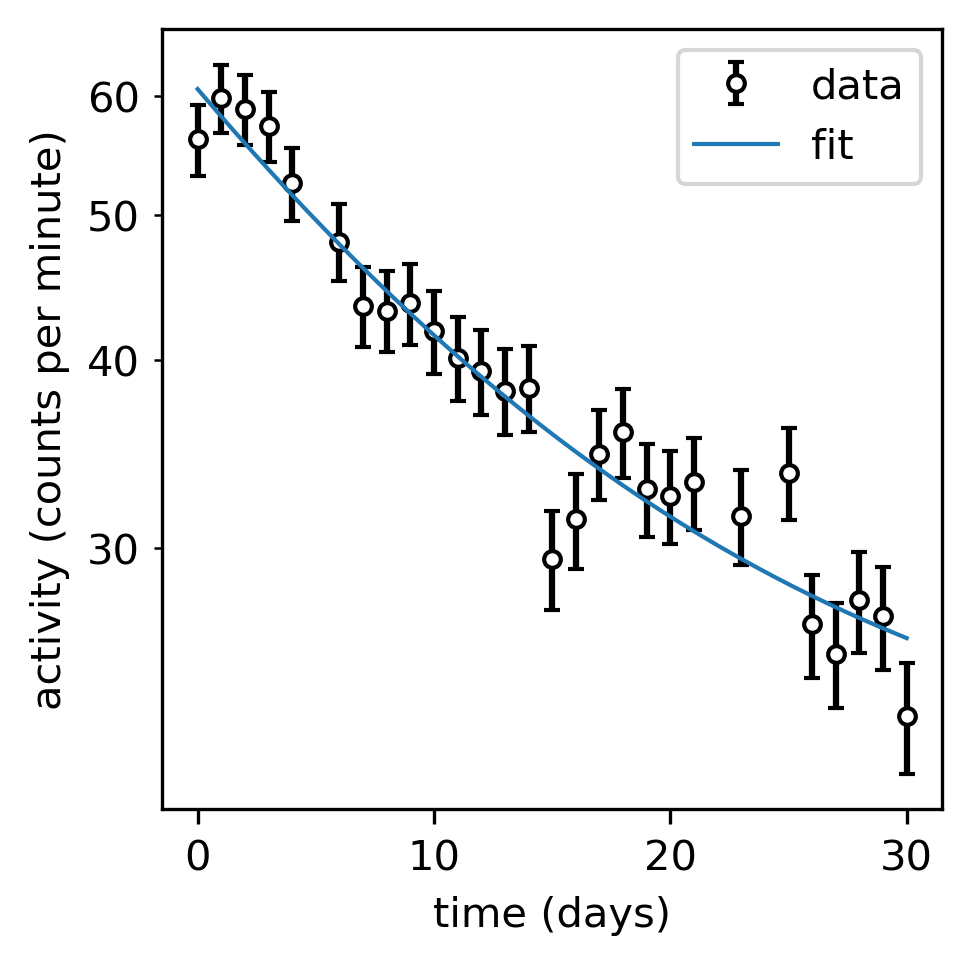

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator,LogFormatter

#average cpm
n = wid_data - 1 # number of data columns
mean_counts = np.mean(counts,axis=1) #mean of counts along the row axis (dimension)
std_counts = np.sqrt(mean_counts/n) #np.sqrt operated on the array, element by element

#if this is not a counting experiment
#std_counts = np.std(counts,axis=1) #standard deviation of counts along the row axis (dimension)

def fit_func(x, a, b, c):
    y = a * np.exp(-b * x) + c
    return y

from scipy.optimize import curve_fit
popt, pcov = curve_fit(fit_func, t, mean_counts, iParm, sigma=std_counts)
perr = np.sqrt(np.diag(pcov))  # extract the standrd error from the covariance matrix

print('a = %0.1e +/-%8.1e cpm; b = %4.3e +/-%4.3e 1/day; c = %4.1e +/-%4.1e cpm ' % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))
half_life = np.log(2)/popt[1]
hl_error = half_life * perr[1]/popt[1]
print('half life = %4.1f +/- %4.1f days' % (half_life, hl_error))

f_width = 3.25
f_height =  3.25
f_dpi = 300

# set up the paramaters for the fit line. 
#You want the point density to be high enough so it looks smooth in the graph.
t_start = 0
t_end = 30
t_steps = 200

tt = np.linspace(t_start,t_end,t_steps) # array of time points for the best-fit line
yy = fit_func(tt,popt[0],popt[1],popt[2]) # Use the parameters from the best fit to generate the best-fit line.
perr = np.sqrt(np.diag(pcov))  # extract the standard error from the covariance matrix

# display the results on the console for convenience, In this example
# the variables are displayed in fixed point format, the number of decimal places 
# was chosen specifically for this example. You will need to change that for your data.
print('results with counts for each time point averaged')
print('a = %4.1f +/-%4.1f cpm; b = %4.3f +/-%4.3f 1/day; c = %4.1f +/-%4.1f cpm ' % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

# calculate and display the half life
half_life = np.log(2)/popt[1]
hl_error = half_life * perr[1]/popt[1]
print('half life = %4.1f +/- %4.1f days' % (half_life, hl_error))
print()

# plot the figure
fig = plt.figure(figsize=(f_width,f_height),dpi=f_dpi)
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# set the font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Helvetica'


plt.yscale('log')
ax.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

# plot the experimental data with the error bars
ax.errorbar(t,mean_counts,color='k',
            marker='o',markersize=4, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.0,
            linestyle='', yerr=std_counts, capsize=2, label='data', zorder=1)

# plot the best fit line
ax.plot(tt,yy,marker='', linestyle='-',linewidth=1,alpha=1, label='fit', zorder=2)

ax.set_xlabel('time (days)')
ax.set_ylabel('activity (counts per minute)')

#set up the legend--you need a legend if you have more two or more things plotted on the same graph

#get handles and labels
handles, labels = ax.get_legend_handles_labels()
# add legend in default order
ax.legend(handles, labels)
#specify order of items in legend
order = [1,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig('plot.png', bbox_inches='tight', dpi=300)

As shown above,We determined the half life of the nuclear fallout to be 11 $\pm$ 2 days, which is a significant result because the half life of radioactive material can be used to determine how long radioactive material will remain in the environment after first being introduced to said environment.